In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Configuración estética
plt.rcParams.update({'font.size': 12, 'lines.linewidth': 1.5})

In [3]:
def cargar_datos_cuanticos(filename):
    """Carga x y las densidades de probabilidad de los archivos .txt"""
    # Leer encabezado para extraer energías si es necesario (opcional)
    with open(filename, 'r') as f:
        linea1 = f.readline()
    
    # Cargar datos saltando la fila del encabezado
    data = np.loadtxt(filename)
    x = data[:, 0]
    densidades = data[:, 1:] # Las 6 columnas de densidades
    return x, densidades

print("Función de carga lista.")

Función de carga lista.


## Potencial |x|

<>:20: SyntaxWarning: invalid escape sequence '\p'
<>:20: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_28829/2968839762.py:20: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('$|\psi(x)|^2$')


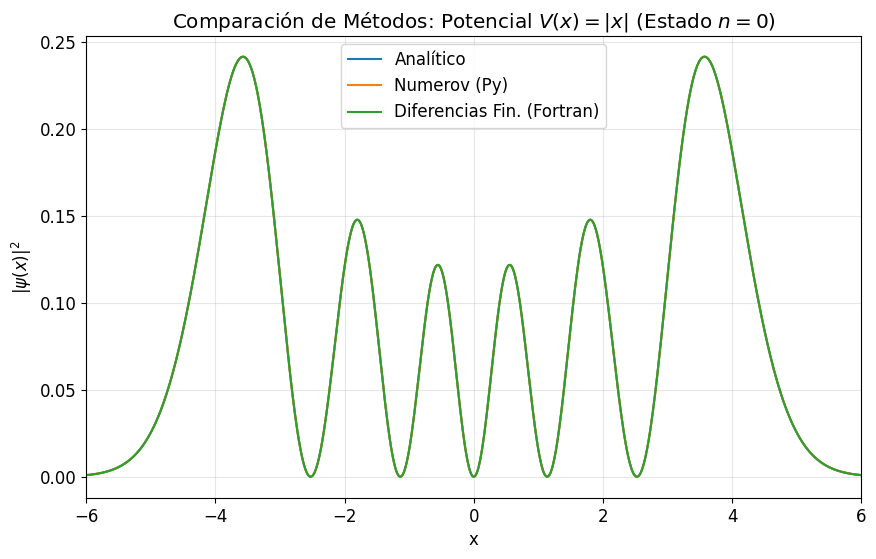

In [10]:
# Rutas de tus archivos (ajusta los nombres si son distintos)
archivos_abs = {
    'Analítico': 'data_abs_analitica.txt',
    'Numerov (Py)': 'data_abs_numerov.txt',
    'Diferencias Fin. (Fortran)': 'data_abs_fortran' # Asegúrate que este sea el nombre
}

plt.figure(figsize=(10, 6))

for etiqueta, nombre_archivo in archivos_abs.items():
    try:
        x, dens = cargar_datos_cuanticos(nombre_archivo)
        # Graficamos el estado fundamental (n=0, columna 0 de densidades)
        plt.plot(x, dens[:, 5], label=etiqueta)
    except FileNotFoundError:
        print(f"Archivo no encontrado: {nombre_archivo}")

plt.title('Comparación de Métodos: Potencial $V(x) = |x|$ (Estado $n=0$)')
plt.xlabel('x')
plt.ylabel('$|\psi(x)|^2$')
plt.xlim(-6, 6) # Ajustamos zoom a la zona de interés
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# --- Configuración de archivos ---
archivos_abs = {
    'Analítico': 'data_abs_analitica.txt',
    'Numerov (Py)': 'data_abs_numerov.txt',
    'Diferencias Fin. (Fortran)': 'data_abs_fortran'
}

# Diccionario para almacenar los datos cargados
datos_metodos = {}

# --- Carga de datos previa ---
for etiqueta, nombre_archivo in archivos_abs.items():
    try:
        # Asumiendo que cargar_datos_cuanticos devuelve (x, matriz_densidades)
        # y que las matrices tienen la misma dimensión de x
        x_val, densidades = cargar_datos_cuanticos(nombre_archivo)
        datos_metodos[etiqueta] = (x_val, densidades)
    except FileNotFoundError:
        print(f"Advertencia: No se encontró {nombre_archivo}")

# Determinamos el número máximo de estados n basándonos en el primer archivo cargado
primer_metodo = list(datos_metodos.keys())[0]
n_max = datos_metodos[primer_metodo][1].shape[1] - 1

# --- Función Interactiva ---
def plot_comparacion_cuantica(n):
    plt.figure(figsize=(10, 6))
    
    for etiqueta, (x, dens) in datos_metodos.items():
        if n < dens.shape[1]:
            plt.plot(x, dens[:, n], label=f'{etiqueta} (n={n})', lw=1.5)
    
    plt.title(f'Comparación de Métodos: Potencial $V(x) = |x|$')
    plt.xlabel('x')
    plt.ylabel(r'$|\psi_n(x)|^2$')
    plt.xlim(-6, 6)
    plt.legend(loc='upper right')
    plt.grid(alpha=0.3)
    
    # Opcional: Si tienes las energías en algún lado, podrías añadirlas 
    # con ax.twinx() como en tu ejemplo anterior.
    
    plt.show()

# --- Slider con Widget ---
interact(
    plot_comparacion_cuantica, 
    n=IntSlider(min=0, max=n_max, step=1, description='Estado n:')
);

interactive(children=(IntSlider(value=0, description='Estado n:', max=5), Output()), _dom_classes=('widget-int…

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# --- 1. Configuración y Carga de Datos ---
archivos = {
    'Numerov (Py)': 'data_abs_numerov.txt',
    'Diferencias Fin. (Fortran)': 'data_abs_fortran', # Asegúrate de la extensión si es necesaria
    'Analítica': 'data_abs_analitica.txt'
}

datos_metodos = {}

for etiqueta, ruta in archivos.items():
    try:
        with open(ruta, "r") as f:
            linea_1 = f.readline()
        
        # Extraer energías: ignoramos el '#' y el valor N_puntos (índices 0 y 1)
        partes = linea_1.split()
        if len(partes) > 2:
            energies_list = np.array(partes[2:], dtype=float)
        else:
            continue
            
        # Cargar matriz (Col 0: x, Col 1...N: densidades)
        data_matrix = np.loadtxt(ruta)
        
        datos_metodos[etiqueta] = {
            'x': data_matrix[:, 0],
            'dens': data_matrix[:, 1:],
            'ener': energies_list
        }
    except Exception as e:
        print(f"No se pudo cargar {etiqueta}: {e}")

# --- 2. Función Interactiva ---
def plot_eigenvector(n):
    if not datos_metodos:
        print("No hay datos cargados.")
        return

    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax2 = ax1.twinx() # Eje para energías
    
    # Azul para Numerov, Naranja para Fortran, Verde para Analítica
    colores = ['#1f77b4', '#ff7f0e', '#2ca02c'] 
    all_E_n = [] 

    for i, (etiqueta, contenido) in enumerate(datos_metodos.items()):
        x = contenido['x']
        dens = contenido['dens']
        ener = contenido['ener']
        color = colores[i % len(colores)]
        
        # Validar que n exista para este método
        if n < dens.shape[1] and n < len(ener):
            # 1. Graficar Densidad de Probabilidad |\psi|^2
            ax1.plot(x, dens[:, n], label=f"{etiqueta}", color=color, lw=2, alpha=0.8)
            
            # 2. Manejar Energías
            E = ener[n]
            all_E_n.append(E)
            
            # Dibujar línea horizontal de energía
            ax2.hlines(E, xmin=x.min(), xmax=x.max(), color=color, 
                       linestyles="dashed", alpha=0.6)
            
            # Texto de la energía (desplazado verticalmente para evitar solapamiento)
            ax2.text(x.max()*0.98, E, rf"$E_{{{n}}}^{{{etiqueta[:3]}}}={E:.4f}$", 
                     color=color, va='bottom', ha='right', fontsize=9)

    # --- Ajustes de Escala y Estética ---
    ax1.set_xlabel('Posición (x)')
    ax1.set_ylabel(r'Densidad de Probabilidad $|\psi_n(x)|^2$')
    ax1.set_xlim(-5, 5) 
    ax1.set_ylim(0, None)
    ax1.grid(True, alpha=0.2)
    ax1.legend(loc='upper left', frameon=True)

    # Ajuste dinámico de ax2 (Energías)
    if all_E_n:
        e_min, e_max = min(all_E_n), max(all_E_n)
        # Si las energías son idénticas, forzamos un rango visible
        if abs(e_max - e_min) < 1e-5:
            ax2.set_ylim(e_min - 0.5, e_min + 0.5)
        else:
            # Margen del 20% respecto a la diferencia entre métodos
            padding = max(0.1, (e_max - e_min) * 0.2)
            ax2.set_ylim(e_min - padding, e_max + padding)
    
    ax2.set_ylabel("Energía (Autovalores)", color='darkred', rotation=270, labelpad=15)
    ax2.tick_params(axis='y', labelcolor='darkred')
    
    plt.title(f"Comparación Analítica vs Numérica (n = {n})")
    plt.tight_layout()
    plt.show()

# --- 3. Generar Slider ---
try:
    # Usamos la solución analítica como referencia para el total de estados si existe
    ref_key = 'Analítica' if 'Analítica' in datos_metodos else list(datos_metodos.keys())[0]
    n_total = len(datos_metodos[ref_key]['ener'])
    
    interact(plot_eigenvector, n=IntSlider(min=0, max=n_total-1, step=1, description='Estado n:'));
except Exception as e:
    print(f"Error al inicializar el widget: {e}")

interactive(children=(IntSlider(value=0, description='Estado n:', max=5), Output()), _dom_classes=('widget-int…

## Potencial x²

<>:20: SyntaxWarning: invalid escape sequence '\p'
<>:20: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_28829/551518880.py:20: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('$|\psi(x)|^2$')


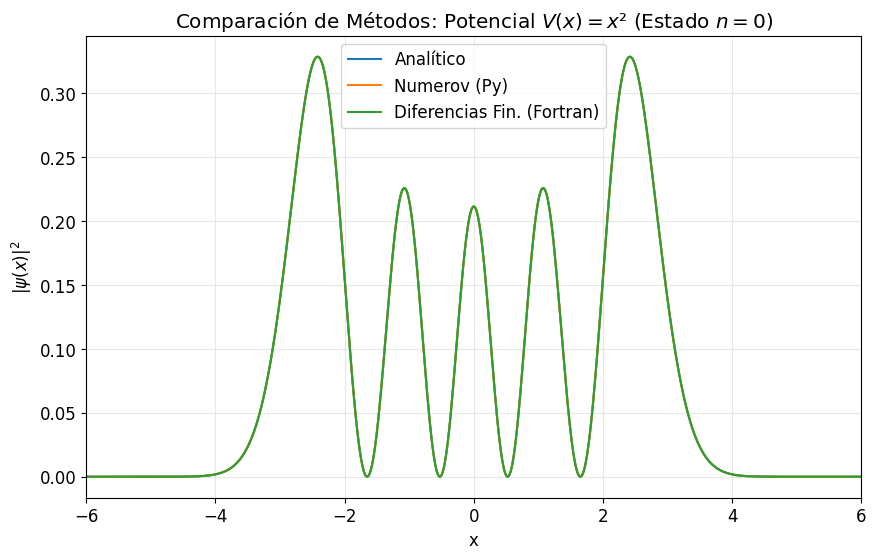

In [13]:
# Rutas de tus archivos (ajusta los nombres si son distintos)
archivos_abs = {
    'Analítico': 'data_osci_analitica.txt',
    'Numerov (Py)': 'data_oscilador.txt',
    'Diferencias Fin. (Fortran)': 'data_oscilador' # Asegúrate que este sea el nombre
}

plt.figure(figsize=(10, 6))

for etiqueta, nombre_archivo in archivos_abs.items():
    try:
        x, dens = cargar_datos_cuanticos(nombre_archivo)
        # Graficamos el estado fundamental (n=0, columna 0 de densidades)
        plt.plot(x, dens[:, 4], label=etiqueta)
    except FileNotFoundError:
        print(f"Archivo no encontrado: {nombre_archivo}")

plt.title('Comparación de Métodos: Potencial $V(x) = x²$ (Estado $n=0$)')
plt.xlabel('x')
plt.ylabel('$|\psi(x)|^2$')
plt.xlim(-6, 6) # Ajustamos zoom a la zona de interés
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# --- Configuración de archivos ---
archivos_abs = {
    'Analítico': 'data_abs_analitica.txt',
    'Numerov (Py)': 'data_abs_numerov.txt',
    'Diferencias Fin. (Fortran)': 'data_abs_fortran'
}

# Diccionario para almacenar los datos cargados
datos_metodos = {}

# --- Carga de datos previa ---
for etiqueta, nombre_archivo in archivos_abs.items():
    try:
        # Asumiendo que cargar_datos_cuanticos devuelve (x, matriz_densidades)
        # y que las matrices tienen la misma dimensión de x
        x_val, densidades = cargar_datos_cuanticos(nombre_archivo)
        datos_metodos[etiqueta] = (x_val, densidades)
    except FileNotFoundError:
        print(f"Advertencia: No se encontró {nombre_archivo}")

# Determinamos el número máximo de estados n basándonos en el primer archivo cargado
primer_metodo = list(datos_metodos.keys())[0]
n_max = datos_metodos[primer_metodo][1].shape[1] - 1

# --- Función Interactiva ---
def plot_comparacion_cuantica(n):
    plt.figure(figsize=(10, 6))
    
    for etiqueta, (x, dens) in datos_metodos.items():
        if n < dens.shape[1]:
            plt.plot(x, dens[:, n], label=f'{etiqueta} (n={n})', lw=1.5)
    
    plt.title(f'Comparación de Métodos: Potencial $V(x) = x²$')
    plt.xlabel('x')
    plt.ylabel(r'$|\psi_n(x)|^2$')
    plt.xlim(-6, 6)
    plt.legend(loc='upper right')
    plt.grid(alpha=0.3)
    
    # Opcional: Si tienes las energías en algún lado, podrías añadirlas 
    # con ax.twinx() como en tu ejemplo anterior.
    
    plt.show()

# --- Slider con Widget ---
interact(
    plot_comparacion_cuantica, 
    n=IntSlider(min=0, max=n_max, step=1, description='Estado n:')
);

interactive(children=(IntSlider(value=0, description='Estado n:', max=5), Output()), _dom_classes=('widget-int…

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# --- 1. Configuración y Carga de Datos ---
archivos = {
    'Numerov (Py)': 'data_oscilador.txt',
    'Diferencias Fin. (Fortran)': 'data_oscilador', # Asegúrate de la extensión si es necesaria
    'Analítica': 'data_osci_analitica.txt'
}

datos_metodos = {}

for etiqueta, ruta in archivos.items():
    try:
        with open(ruta, "r") as f:
            linea_1 = f.readline()
        
        # Extraer energías: ignoramos el '#' y el valor N_puntos (índices 0 y 1)
        partes = linea_1.split()
        if len(partes) > 2:
            energies_list = np.array(partes[2:], dtype=float)
        else:
            continue
            
        # Cargar matriz (Col 0: x, Col 1...N: densidades)
        data_matrix = np.loadtxt(ruta)
        
        datos_metodos[etiqueta] = {
            'x': data_matrix[:, 0],
            'dens': data_matrix[:, 1:],
            'ener': energies_list
        }
    except Exception as e:
        print(f"No se pudo cargar {etiqueta}: {e}")

# --- 2. Función Interactiva ---
def plot_eigenvector(n):
    if not datos_metodos:
        print("No hay datos cargados.")
        return

    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax2 = ax1.twinx() # Eje para energías
    
    # Azul para Numerov, Naranja para Fortran, Verde para Analítica
    colores = ['#1f77b4', '#ff7f0e', '#2ca02c'] 
    all_E_n = [] 

    for i, (etiqueta, contenido) in enumerate(datos_metodos.items()):
        x = contenido['x']
        dens = contenido['dens']
        ener = contenido['ener']
        color = colores[i % len(colores)]
        
        # Validar que n exista para este método
        if n < dens.shape[1] and n < len(ener):
            # 1. Graficar Densidad de Probabilidad |\psi|^2
            ax1.plot(x, dens[:, n], label=f"{etiqueta}", color=color, lw=2, alpha=0.8)
            
            # 2. Manejar Energías
            E = ener[n]
            all_E_n.append(E)
            
            # Dibujar línea horizontal de energía
            ax2.hlines(E, xmin=x.min(), xmax=x.max(), color=color, 
                       linestyles="dashed", alpha=0.6)
            
            # Texto de la energía (desplazado verticalmente para evitar solapamiento)
            ax2.text(x.max()*0.98, E, rf"$E_{{{n}}}^{{{etiqueta[:3]}}}={E:.4f}$", 
                     color=color, va='bottom', ha='right', fontsize=9)

    # --- Ajustes de Escala y Estética ---
    ax1.set_xlabel('Posición (x)')
    ax1.set_ylabel(r'Densidad de Probabilidad $|\psi_n(x)|^2$')
    ax1.set_xlim(-5, 5) 
    ax1.set_ylim(0, None)
    ax1.grid(True, alpha=0.2)
    ax1.legend(loc='upper left', frameon=True)

    # Ajuste dinámico de ax2 (Energías)
    if all_E_n:
        e_min, e_max = min(all_E_n), max(all_E_n)
        # Si las energías son idénticas, forzamos un rango visible
        if abs(e_max - e_min) < 1e-5:
            ax2.set_ylim(e_min - 0.5, e_min + 0.5)
        else:
            # Margen del 20% respecto a la diferencia entre métodos
            padding = max(0.1, (e_max - e_min) * 0.2)
            ax2.set_ylim(e_min - padding, e_max + padding)
    
    ax2.set_ylabel("Energía (Autovalores)", color='darkred', rotation=270, labelpad=15)
    ax2.tick_params(axis='y', labelcolor='darkred')
    
    plt.title(f"Oscilador Armónico: Comparación Analítica vs Numérica (n = {n})")
    plt.tight_layout()
    plt.show()

# --- 3. Generar Slider ---
try:
    # Usamos la solución analítica como referencia para el total de estados si existe
    ref_key = 'Analítica' if 'Analítica' in datos_metodos else list(datos_metodos.keys())[0]
    n_total = len(datos_metodos[ref_key]['ener'])
    
    interact(plot_eigenvector, n=IntSlider(min=0, max=n_total-1, step=1, description='Estado n:'));
except Exception as e:
    print(f"Error al inicializar el widget: {e}")

interactive(children=(IntSlider(value=0, description='Estado n:', max=5), Output()), _dom_classes=('widget-int…

## Potencial x⁴

<>:19: SyntaxWarning: invalid escape sequence '\p'
<>:19: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_28829/309424958.py:19: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('$|\psi(x)|^2$')


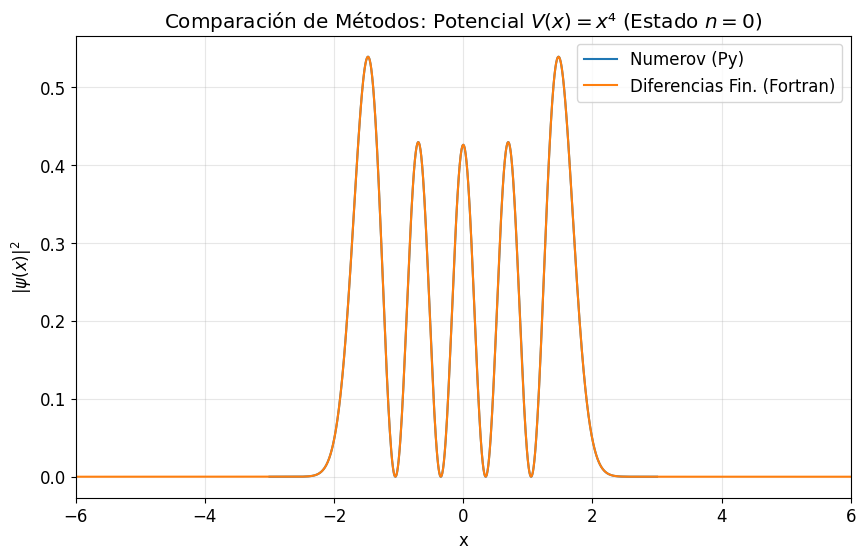

In [16]:
# Rutas de tus archivos (ajusta los nombres si son distintos)
archivos_abs = {
    'Numerov (Py)': 'data_x4_numerov.txt',
    'Diferencias Fin. (Fortran)': 'data_x4_fortran' # Asegúrate que este sea el nombre
}

plt.figure(figsize=(10, 6))

for etiqueta, nombre_archivo in archivos_abs.items():
    try:
        x, dens = cargar_datos_cuanticos(nombre_archivo)
        # Graficamos el estado fundamental (n=0, columna 0 de densidades)
        plt.plot(x, dens[:, 4], label=etiqueta)
    except FileNotFoundError:
        print(f"Archivo no encontrado: {nombre_archivo}")

plt.title('Comparación de Métodos: Potencial $V(x) = x⁴$ (Estado $n=0$)')
plt.xlabel('x')
plt.ylabel('$|\psi(x)|^2$')
plt.xlim(-6, 6) # Ajustamos zoom a la zona de interés
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# --- Configuración de archivos ---
archivos_abs = {
    'Diferencias Fin. (Fortran)': 'data_x4_fortran',
    'Numerov (Py)': 'data_x4_numerov.txt',
}

# Diccionario para almacenar los datos cargados
datos_metodos = {}

# --- Carga de datos previa ---
for etiqueta, nombre_archivo in archivos_abs.items():
    try:
        # Asumiendo que cargar_datos_cuanticos devuelve (x, matriz_densidades)
        # y que las matrices tienen la misma dimensión de x
        x_val, densidades = cargar_datos_cuanticos(nombre_archivo)
        datos_metodos[etiqueta] = (x_val, densidades)
    except FileNotFoundError:
        print(f"Advertencia: No se encontró {nombre_archivo}")

# Determinamos el número máximo de estados n basándonos en el primer archivo cargado
primer_metodo = list(datos_metodos.keys())[0]
n_max = datos_metodos[primer_metodo][1].shape[1] - 1

# --- Función Interactiva ---
def plot_comparacion_cuantica(n):
    plt.figure(figsize=(10, 6))
    
    for etiqueta, (x, dens) in datos_metodos.items():
        if n < dens.shape[1]:
            plt.plot(x, dens[:, n], label=f'{etiqueta} (n={n})', lw=1.5)
    
    plt.title(f'Comparación de Métodos: Potencial $V(x) = x⁴$')
    plt.xlabel('x')
    plt.ylabel(r'$|\psi_n(x)|^2$')
    plt.xlim(-6, 6)
    plt.legend(loc='upper right')
    plt.grid(alpha=0.3)
    
    # Opcional: Si tienes las energías en algún lado, podrías añadirlas 
    # con ax.twinx() como en tu ejemplo anterior.
    
    plt.show()

# --- Slider con Widget ---
interact(
    plot_comparacion_cuantica, 
    n=IntSlider(min=0, max=n_max, step=1, description='Estado n:')
);

interactive(children=(IntSlider(value=0, description='Estado n:', max=5), Output()), _dom_classes=('widget-int…

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# --- 1. Configuración y Carga de Datos ---
archivos = {
    'Numerov (Py)': 'data_x4_numerov.txt',
    'Diferencias Fin. (Fortran)': 'data_x4_fortran'
}

datos_metodos = {}

for etiqueta, ruta in archivos.items():
    try:
        with open(ruta, "r") as f:
            linea_1 = f.readline()
        
        # Extraer energías (asumiendo que empiezan en el índice 2)
        energies_list = np.array(linea_1.split()[2:], dtype=float)
        
        # Cargar matriz (Col 0: x, Col 1...N: densidades)
        data_matrix = np.loadtxt(ruta)
        
        datos_metodos[etiqueta] = {
            'x': data_matrix[:, 0],
            'dens': data_matrix[:, 1:],
            'ener': energies_list
        }
    except Exception as e:
        print(f"Error al cargar {etiqueta}: {e}")

# --- 2. Función Interactiva ---
def plot_eigenvector(n):
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax2 = ax1.twinx() # Eje para energías
    
    colores = ['#1f77b4', '#ff7f0e']
    all_E_n = [] # Para ajustar la escala dinámica de ax2

    for i, (etiqueta, contenido) in enumerate(datos_metodos.items()):
        x = contenido['x']
        dens = contenido['dens']
        ener = contenido['ener']
        color = colores[i % len(colores)]
        
        if n < dens.shape[1]:
            # Graficar Densidad en ax1
            ax1.plot(x, dens[:, n], label=f"{etiqueta}", color=color, lw=2)
            
            # Datos de energía para ax2
            E = ener[n]
            all_E_n.append(E)
            ax2.hlines(E, xmin=x.min(), xmax=x.max(), color=color, linestyles="dashed")
            ax2.text(x.max()*0.75, E, rf"$E_{{{n}}}={E:.4f}$", 
                     color=color, va='bottom', ha='right', fontsize=10)

    # --- Ajuste Crítico de Escalas ---
    ax1.set_xlabel('x')
    ax1.set_ylabel(r'$|\psi_n(x)|^2$')
    ax1.set_xlim(-5, 5) # Ajusta según tu potencial
    ax1.set_ylim(0, None) # La densidad siempre es positiva
    ax1.grid(alpha=0.3)
    ax1.legend(loc='upper left')

    # Ajuste dinámico del eje de energía (ax2)
    if all_E_n:
        margin = 0.5 # Margen de visualización arriba/abajo de la energía
        ax2.set_ylim(min(all_E_n) - margin, max(all_E_n) + margin)
    
    ax2.set_ylabel("Energía", color='darkred')
    ax2.tick_params(axis='y', labelcolor='darkred')
    
    plt.title(f"Comparación de Métodos — Estado n = {n}")
    plt.show()

# --- 3. Generar Slider ---
# Determinamos el n_max basándonos en el primer archivo disponible
try:
    primer_key = list(datos_metodos.keys())[0]
    n_total = len(datos_metodos[primer_key]['ener'])
    interact(plot_eigenvector, n=IntSlider(min=0, max=n_total-1, step=1, description='Estado n:'));
except IndexError:
    print("No se cargaron datos. Verifica los nombres de los archivos.")

interactive(children=(IntSlider(value=0, description='Estado n:', max=5), Output()), _dom_classes=('widget-int…

## Potencial V(x)=x⁴ - 5x²

<>:19: SyntaxWarning: invalid escape sequence '\p'
<>:19: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_28829/457980457.py:19: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('$|\psi(x)|^2$')


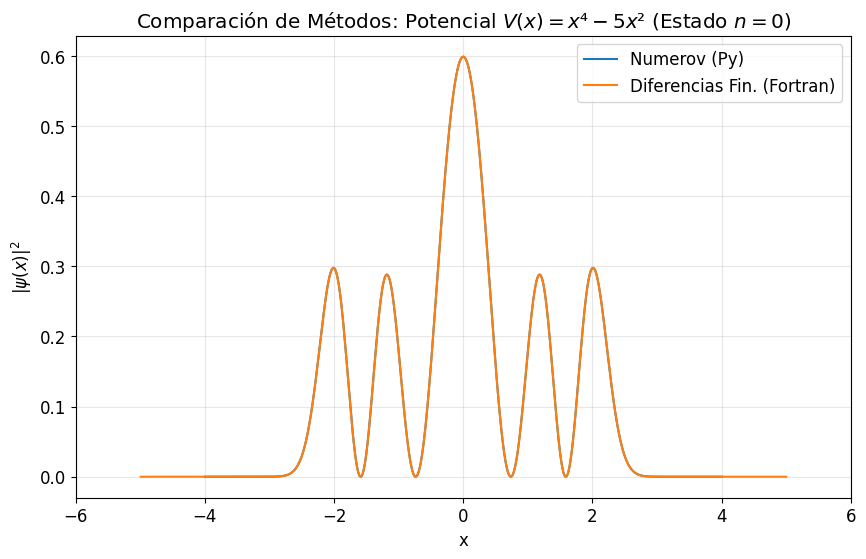

In [19]:
# Rutas de tus archivos (ajusta los nombres si son distintos)
archivos_abs = {
    'Numerov (Py)': 'data_doble_pozo_numerov.txt',
    'Diferencias Fin. (Fortran)': 'data_doble_pozo_fortran' # Asegúrate que este sea el nombre
}

plt.figure(figsize=(10, 6))

for etiqueta, nombre_archivo in archivos_abs.items():
    try:
        x, dens = cargar_datos_cuanticos(nombre_archivo)
        # Graficamos el estado fundamental (n=0, columna 0 de densidades)
        plt.plot(x, dens[:, 4], label=etiqueta)
    except FileNotFoundError:
        print(f"Archivo no encontrado: {nombre_archivo}")

plt.title('Comparación de Métodos: Potencial $V(x) = x⁴ - 5x²$ (Estado $n=0$)')
plt.xlabel('x')
plt.ylabel('$|\psi(x)|^2$')
plt.xlim(-6, 6) # Ajustamos zoom a la zona de interés
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# --- Configuración de archivos ---
archivos_abs = {
    'Diferencias Fin. (Fortran)': 'data_doble_pozo_fortran',
    'Numerov (Py)': 'data_doble_pozo_numerov.txt',
}

# Diccionario para almacenar los datos cargados
datos_metodos = {}

# --- Carga de datos previa ---
for etiqueta, nombre_archivo in archivos_abs.items():
    try:
        # Asumiendo que cargar_datos_cuanticos devuelve (x, matriz_densidades)
        # y que las matrices tienen la misma dimensión de x
        x_val, densidades = cargar_datos_cuanticos(nombre_archivo)
        datos_metodos[etiqueta] = (x_val, densidades)
    except FileNotFoundError:
        print(f"Advertencia: No se encontró {nombre_archivo}")

# Determinamos el número máximo de estados n basándonos en el primer archivo cargado
primer_metodo = list(datos_metodos.keys())[0]
n_max = datos_metodos[primer_metodo][1].shape[1] - 1

# --- Función Interactiva ---
def plot_comparacion_cuantica(n):
    plt.figure(figsize=(10, 6))
    
    for etiqueta, (x, dens) in datos_metodos.items():
        if n < dens.shape[1]:
            plt.plot(x, dens[:, n], label=f'{etiqueta} (n={n})', lw=1.5)
    
    plt.title(f'Comparación de Métodos: Potencial $V(x) = x⁴ - 5x²$')
    plt.xlabel('x')
    plt.ylabel(r'$|\psi_n(x)|^2$')
    plt.xlim(-6, 6)
    plt.legend(loc='upper right')
    plt.grid(alpha=0.3)
    
    # Opcional: Si tienes las energías en algún lado, podrías añadirlas 
    # con ax.twinx() como en tu ejemplo anterior.
    
    plt.show()

# --- Slider con Widget ---
interact(
    plot_comparacion_cuantica, 
    n=IntSlider(min=0, max=n_max, step=1, description='Estado n:')
);

interactive(children=(IntSlider(value=0, description='Estado n:', max=5), Output()), _dom_classes=('widget-int…

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# --- 1. Configuración y Carga de Datos ---
archivos = {
    'Numerov (Py)': 'data_doble_pozo_numerov.txt',
    'Diferencias Fin. (Fortran)': 'data_doble_pozo_fortran'
}

datos_metodos = {}

for etiqueta, ruta in archivos.items():
    try:
        with open(ruta, "r") as f:
            linea_1 = f.readline()
        
        # Extraer energías (asumiendo que empiezan en el índice 2)
        energies_list = np.array(linea_1.split()[2:], dtype=float)
        
        # Cargar matriz (Col 0: x, Col 1...N: densidades)
        data_matrix = np.loadtxt(ruta)
        
        datos_metodos[etiqueta] = {
            'x': data_matrix[:, 0],
            'dens': data_matrix[:, 1:],
            'ener': energies_list
        }
    except Exception as e:
        print(f"Error al cargar {etiqueta}: {e}")

# --- 2. Función Interactiva ---
def plot_eigenvector(n):
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax2 = ax1.twinx() # Eje para energías
    
    colores = ['#1f77b4', '#ff7f0e']
    all_E_n = [] # Para ajustar la escala dinámica de ax2

    for i, (etiqueta, contenido) in enumerate(datos_metodos.items()):
        x = contenido['x']
        dens = contenido['dens']
        ener = contenido['ener']
        color = colores[i % len(colores)]
        
        if n < dens.shape[1]:
            # Graficar Densidad en ax1
            ax1.plot(x, dens[:, n], label=f"{etiqueta}", color=color, lw=2)
            
            # Datos de energía para ax2
            E = ener[n]
            all_E_n.append(E)
            ax2.hlines(E, xmin=x.min(), xmax=x.max(), color=color, linestyles="dashed")
            ax2.text(x.max()*0.75, E, rf"$E_{{{n}}}={E:.4f}$", 
                     color=color, va='bottom', ha='right', fontsize=10)

    # --- Ajuste Crítico de Escalas ---
    ax1.set_xlabel('x')
    ax1.set_ylabel(r'$|\psi_n(x)|^2$')
    ax1.set_xlim(-5, 5) # Ajusta según tu potencial
    ax1.set_ylim(0, None) # La densidad siempre es positiva
    ax1.grid(alpha=0.3)
    ax1.legend(loc='upper left')

    # Ajuste dinámico del eje de energía (ax2)
    if all_E_n:
        margin = 0.5 # Margen de visualización arriba/abajo de la energía
        ax2.set_ylim(min(all_E_n) - margin, max(all_E_n) + margin)
    
    ax2.set_ylabel("Energía", color='darkred')
    ax2.tick_params(axis='y', labelcolor='darkred')
    
    plt.title(f"Comparación de Métodos — Estado n = {n}")
    plt.show()

# --- 3. Generar Slider ---
# Determinamos el n_max basándonos en el primer archivo disponible
try:
    primer_key = list(datos_metodos.keys())[0]
    n_total = len(datos_metodos[primer_key]['ener'])
    interact(plot_eigenvector, n=IntSlider(min=0, max=n_total-1, step=1, description='Estado n:'));
except IndexError:
    print("No se cargaron datos. Verifica los nombres de los archivos.")

interactive(children=(IntSlider(value=0, description='Estado n:', max=5), Output()), _dom_classes=('widget-int…

## Comparación de energías entre métodos

## Oscilador cuántico

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# --- 1. Configuración y Carga de Datos ---
archivos = {
    'Numerov (Py)': 'data_oscilador.txt',
    'Diferencias Fin. (Fortran)': 'data_oscilador',
    'Analítica': 'data_osci_analitica.txt'
}

datos_metodos = {}

for etiqueta, ruta in archivos.items():
    try:
        with open(ruta, "r") as f:
            linea_1 = f.readline()
        
        partes = linea_1.split()
        if len(partes) > 2:
            energies_list = np.array(partes[2:], dtype=float)
            data_matrix = np.loadtxt(ruta)
            
            datos_metodos[etiqueta] = {
                'x': data_matrix[:, 0],
                'dens': data_matrix[:, 1:],
                'ener': energies_list
            }
    except Exception as e:
        print(f"Error al cargar {etiqueta}: {e}")

# --- 2. Función de Visualización y Cálculo de Error ---
def plot_comparativa_errores(n):
    if 'Analítica' not in datos_metodos:
        print("Error: Se requiere la solución 'Analítica' para calcular errores.")
        return

    # Crear figura con dos subplots (1 fila, 2 columnas)
    fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(15, 6))
    ax2 = ax1.twinx() # Eje de energía para la primera gráfica
    
    colores = {'Numerov (Py)': '#1f77b4', 'Diferencias Fin. (Fortran)': '#ff7f0e', 'Analítica': '#2ca02c'}
    
    E_ana = datos_metodos['Analítica']['ener'][n]
    metodos_num = [m for m in datos_metodos.keys() if m != 'Analítica']
    nombres_barras = []
    valores_error = []
    colores_barras = []

    # --- Gráfica 1: Funciones de Onda y Energía ---
    for etiqueta, contenido in datos_metodos.items():
        if n < contenido['dens'].shape[1]:
            x, dens, ener = contenido['x'], contenido['dens'], contenido['ener']
            color = colores.get(etiqueta, 'black')
            
            # Graficar |\psi|^2
            ax1.plot(x, dens[:, n], label=etiqueta, color=color, lw=2, alpha=0.8)
            
            # Graficar Energía
            E = ener[n]
            ax2.hlines(E, xmin=x.min(), xmax=x.max(), color=color, linestyles="--", alpha=0.5)
            
            # Calcular Error si es un método numérico
            if etiqueta != 'Analítica':
                error_rel = np.abs((E_ana - E) / E_ana) * 100
                nombres_barras.append(etiqueta)
                valores_error.append(error_rel)
                colores_barras.append(color)

    ax1.set_title(f"Funciones de Onda (n = {n})")
    ax1.set_xlabel("x")
    ax1.set_ylabel(r"$|\psi_n(x)|^2$")
    ax1.legend(loc='upper left')
    ax2.set_ylabel("Energía")
    
    # Ajuste de escala energía
    ax2.set_ylim(E_ana - 0.5, E_ana + 0.5)

    # --- Gráfica 2: Barras de Error Relativo ---
    bars = ax3.bar(nombres_barras, valores_error, color=colores_barras, alpha=0.8)
    ax3.set_title(f"Error Relativo en Energía (n = {n})")
    ax3.set_ylabel("Error Relativo (%)")
    ax3.grid(axis='y', linestyle='--', alpha=0.6)
    
    # Añadir etiquetas de valor sobre las barras
    for bar in bars:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.2e}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

    # Ajuste para evitar que el eje Y sea muy pequeño (si el error es 0)
    if max(valores_error + [0]) < 1e-10:
        ax3.set_ylim(0, 1e-8)

    plt.tight_layout()
    plt.show()

# --- 3. Generar Interacción ---
try:
    n_max = len(datos_metodos['Analítica']['ener']) - 1
    interact(plot_comparativa_errores, n=IntSlider(min=0, max=n_max, step=1, description='Estado n:'))
except KeyError:
    print("Asegúrate de que el archivo 'Analítica' esté bien cargado.")

interactive(children=(IntSlider(value=0, description='Estado n:', max=5), Output()), _dom_classes=('widget-int…

## Potencial |x|

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# --- 1. Configuración y Carga de Datos ---
archivos = {
    'Numerov (Py)': 'data_abs_numerov.txt',
    'Diferencias Fin. (Fortran)': 'data_abs_fortran',
    'Analítica': 'data_abs_analitica.txt'
}

datos_metodos = {}

for etiqueta, ruta in archivos.items():
    try:
        with open(ruta, "r") as f:
            linea_1 = f.readline()
        
        partes = linea_1.split()
        if len(partes) > 2:
            energies_list = np.array(partes[2:], dtype=float)
            data_matrix = np.loadtxt(ruta)
            
            datos_metodos[etiqueta] = {
                'x': data_matrix[:, 0],
                'dens': data_matrix[:, 1:],
                'ener': energies_list
            }
    except Exception as e:
        print(f"Error al cargar {etiqueta}: {e}")

# --- 2. Función de Visualización y Cálculo de Error ---
def plot_comparativa_errores(n):
    if 'Analítica' not in datos_metodos:
        print("Error: Se requiere la solución 'Analítica' para calcular errores.")
        return

    # Crear figura con dos subplots (1 fila, 2 columnas)
    fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(15, 6))
    ax2 = ax1.twinx() # Eje de energía para la primera gráfica
    
    colores = {'Numerov (Py)': '#1f77b4', 'Diferencias Fin. (Fortran)': '#ff7f0e', 'Analítica': '#2ca02c'}
    
    E_ana = datos_metodos['Analítica']['ener'][n]
    metodos_num = [m for m in datos_metodos.keys() if m != 'Analítica']
    nombres_barras = []
    valores_error = []
    colores_barras = []

    # --- Gráfica 1: Funciones de Onda y Energía ---
    for etiqueta, contenido in datos_metodos.items():
        if n < contenido['dens'].shape[1]:
            x, dens, ener = contenido['x'], contenido['dens'], contenido['ener']
            color = colores.get(etiqueta, 'black')
            
            # Graficar |\psi|^2
            ax1.plot(x, dens[:, n], label=etiqueta, color=color, lw=2, alpha=0.8)
            
            # Graficar Energía
            E = ener[n]
            ax2.hlines(E, xmin=x.min(), xmax=x.max(), color=color, linestyles="--", alpha=0.5)
            
            # Calcular Error si es un método numérico
            if etiqueta != 'Analítica':
                error_rel = np.abs((E_ana - E) / E_ana) * 100
                nombres_barras.append(etiqueta)
                valores_error.append(error_rel)
                colores_barras.append(color)

    ax1.set_title(f"Funciones de Onda (n = {n})")
    ax1.set_xlabel("x")
    ax1.set_ylabel(r"$|\psi_n(x)|^2$")
    ax1.legend(loc='upper left')
    ax2.set_ylabel("Energía")
    
    # Ajuste de escala energía
    ax2.set_ylim(E_ana - 0.5, E_ana + 0.5)

    # --- Gráfica 2: Barras de Error Relativo ---
    bars = ax3.bar(nombres_barras, valores_error, color=colores_barras, alpha=0.8)
    ax3.set_title(f"Error Relativo en Energía (n = {n})")
    ax3.set_ylabel("Error Relativo (%)")
    ax3.grid(axis='y', linestyle='--', alpha=0.6)
    
    # Añadir etiquetas de valor sobre las barras
    for bar in bars:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.2e}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

    # Ajuste para evitar que el eje Y sea muy pequeño (si el error es 0)
    if max(valores_error + [0]) < 1e-10:
        ax3.set_ylim(0, 1e-8)

    plt.tight_layout()
    plt.show()

# --- 3. Generar Interacción ---
try:
    n_max = len(datos_metodos['Analítica']['ener']) - 1
    interact(plot_comparativa_errores, n=IntSlider(min=0, max=n_max, step=1, description='Estado n:'))
except KeyError:
    print("Asegúrate de que el archivo 'Analítica' esté bien cargado.")

interactive(children=(IntSlider(value=0, description='Estado n:', max=5), Output()), _dom_classes=('widget-int…

## Potencial x⁴

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# --- 1. Configuración y Carga de Datos ---
archivos_abs = {
    'Numerov (Py)': 'data_x4_numerov.txt',
    'Diferencias Fin. (Fortran)': 'data_x4_fortran'
}

datos_metodos = {}

for etiqueta, ruta in archivos_abs.items():
    try:
        with open(ruta, "r") as f:
            linea_1 = f.readline()
        
        # Estructura: # N_puntos E0 E1 E2...
        valores = linea_1.split()
        # Empezamos en el índice 2 para saltar el '#' y el número de puntos
        energies_list = np.array(valores[2:], dtype=float)
        
        data_matrix = np.loadtxt(ruta)
        
        datos_metodos[etiqueta] = {
            'x': data_matrix[:, 0],
            'dens': data_matrix[:, 1:],
            'ener': energies_list
        }
    except Exception as e:
        print(f"Error cargando {etiqueta}: {e}")

# --- 2. Función Interactiva ---
def plot_comparativa_num(n):
    # Verificamos que ambos métodos existan
    metodos = list(datos_metodos.keys())
    if len(metodos) < 2:
        print("Se necesitan al menos dos archivos para comparar.")
        return

    fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(15, 6))
    ax2 = ax1.twinx() # Eje energía
    
    colores = ['#1f77b4', '#ff7f0e']
    ener_n = []

    # --- Gráfica Izquierda: Funciones de onda ---
    for i, etiqueta in enumerate(metodos):
        contenido = datos_metodos[etiqueta]
        x, dens, ener = contenido['x'], contenido['dens'], contenido['ener']
        color = colores[i]
        
        if n < dens.shape[1]:
            ax1.plot(x, dens[:, n], label=etiqueta, color=color, lw=2, alpha=0.7)
            
            E = ener[n]
            ener_n.append(E)
            ax2.hlines(E, xmin=x.min(), xmax=x.max(), color=color, linestyles="--")
            ax2.text(x.max()*0.9, E, f"$E_{n}={E:.4f}$", color=color, va='bottom', ha='right')

    ax1.set_title(f"Funciones de Onda: Estado n = {n}")
    ax1.set_xlabel("x")
    ax1.set_ylabel(r"$|\psi_n(x)|^2$")
    ax1.legend(loc='upper left')
    
    # Ajuste dinámico de escala de energía
    if len(ener_n) == 2:
        E_mean = np.mean(ener_n)
        ax2.set_ylim(E_mean - 0.5, E_mean + 0.5)

    # --- Gráfica Derecha: Diagrama de Barras de Energía ---
    # Comparamos directamente los valores de energía
    ax3.bar(metodos, ener_n, color=colores, alpha=0.8, width=0.6)
    
    # Añadir etiquetas con el valor exacto sobre las barras
    for i, v in enumerate(ener_n):
        ax3.text(i, v, f'{v:.5f}', ha='center', va='bottom', fontweight='bold')

    # Calcular y mostrar la diferencia absoluta como un texto informativo
    dif_abs = abs(ener_n[0] - ener_n[1])
    ax3.set_title(f"Comparación de Autovalores $E_n$\n$\Delta E = {dif_abs:.2e}$")
    ax3.set_ylabel("Energía")
    
    # Ajustar eje Y para que las barras no empiecen desde 0 si las energías son grandes
    # y negativas (común en pozos de potencial)
    ax3.set_ylim(min(ener_n) - 1.0, max(ener_n) + 1.0)

    plt.tight_layout()
    plt.show()

# --- 3. Ejecución ---
try:
    primer_metodo = list(datos_metodos.keys())[0]
    n_total = len(datos_metodos[primer_metodo]['ener'])
    interact(plot_comparativa_num, n=IntSlider(min=0, max=n_total-1, step=1, description='Estado n:'))
except Exception as e:
    print(f"Error al iniciar: {e}")

<>:81: SyntaxWarning: invalid escape sequence '\D'
<>:81: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_28829/237031866.py:81: SyntaxWarning: invalid escape sequence '\D'
  ax3.set_title(f"Comparación de Autovalores $E_n$\n$\Delta E = {dif_abs:.2e}$")


interactive(children=(IntSlider(value=0, description='Estado n:', max=5), Output()), _dom_classes=('widget-int…

## Doble pozo V(x)=x⁴-5x²

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# --- 1. Configuración y Carga de Datos ---
archivos_abs = {
    'Numerov (Py)': 'data_doble_pozo_numerov.txt',
    'Diferencias Fin. (Fortran)': 'data_doble_pozo_fortran'
}

datos_metodos = {}

for etiqueta, ruta in archivos_abs.items():
    try:
        with open(ruta, "r") as f:
            linea_1 = f.readline()
        
        # Estructura: # N_puntos E0 E1 E2...
        valores = linea_1.split()
        # Empezamos en el índice 2 para saltar el '#' y el número de puntos
        energies_list = np.array(valores[2:], dtype=float)
        
        data_matrix = np.loadtxt(ruta)
        
        datos_metodos[etiqueta] = {
            'x': data_matrix[:, 0],
            'dens': data_matrix[:, 1:],
            'ener': energies_list
        }
    except Exception as e:
        print(f"Error cargando {etiqueta}: {e}")

# --- 2. Función Interactiva ---
def plot_comparativa_num(n):
    # Verificamos que ambos métodos existan
    metodos = list(datos_metodos.keys())
    if len(metodos) < 2:
        print("Se necesitan al menos dos archivos para comparar.")
        return

    fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(15, 6))
    ax2 = ax1.twinx() # Eje energía
    
    colores = ['#1f77b4', '#ff7f0e']
    ener_n = []

    # --- Gráfica Izquierda: Funciones de onda ---
    for i, etiqueta in enumerate(metodos):
        contenido = datos_metodos[etiqueta]
        x, dens, ener = contenido['x'], contenido['dens'], contenido['ener']
        color = colores[i]
        
        if n < dens.shape[1]:
            ax1.plot(x, dens[:, n], label=etiqueta, color=color, lw=2, alpha=0.7)
            
            E = ener[n]
            ener_n.append(E)
            ax2.hlines(E, xmin=x.min(), xmax=x.max(), color=color, linestyles="--")
            ax2.text(x.max()*0.9, E, f"$E_{n}={E:.4f}$", color=color, va='bottom', ha='right')

    ax1.set_title(f"Funciones de Onda: Estado n = {n}")
    ax1.set_xlabel("x")
    ax1.set_ylabel(r"$|\psi_n(x)|^2$")
    ax1.legend(loc='upper left')
    
    # Ajuste dinámico de escala de energía
    if len(ener_n) == 2:
        E_mean = np.mean(ener_n)
        ax2.set_ylim(E_mean - 0.5, E_mean + 0.5)

    # --- Gráfica Derecha: Diagrama de Barras de Energía ---
    # Comparamos directamente los valores de energía
    ax3.bar(metodos, ener_n, color=colores, alpha=0.8, width=0.6)
    
    # Añadir etiquetas con el valor exacto sobre las barras
    for i, v in enumerate(ener_n):
        ax3.text(i, v, f'{v:.5f}', ha='center', va='bottom', fontweight='bold')

    # Calcular y mostrar la diferencia absoluta como un texto informativo
    dif_abs = abs(ener_n[0] - ener_n[1])
    ax3.set_title(f"Comparación de Autovalores $E_n$\n$\Delta E = {dif_abs:.2e}$")
    ax3.set_ylabel("Energía")
    
    # Ajustar eje Y para que las barras no empiecen desde 0 si las energías son grandes
    # y negativas (común en pozos de potencial)
    ax3.set_ylim(min(ener_n) - 1.0, max(ener_n) + 1.0)

    plt.tight_layout()
    plt.show()

# --- 3. Ejecución ---
try:
    primer_metodo = list(datos_metodos.keys())[0]
    n_total = len(datos_metodos[primer_metodo]['ener'])
    interact(plot_comparativa_num, n=IntSlider(min=0, max=n_total-1, step=1, description='Estado n:'))
except Exception as e:
    print(f"Error al iniciar: {e}")

<>:81: SyntaxWarning: invalid escape sequence '\D'
<>:81: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_28829/2976332105.py:81: SyntaxWarning: invalid escape sequence '\D'
  ax3.set_title(f"Comparación de Autovalores $E_n$\n$\Delta E = {dif_abs:.2e}$")


interactive(children=(IntSlider(value=0, description='Estado n:', max=5), Output()), _dom_classes=('widget-int…